In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 142MB/s] 



0: 384x640 2 persons, 2 ties, 578.2ms
Speed: 14.3ms preprocess, 578.2ms inference, 40.5ms postprocess per image at shape (1, 3, 384, 640)


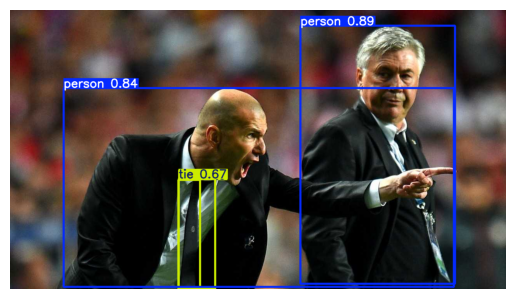

In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
model=YOLO("yolov5s.pt")
url="https://ultralytics.com/images/zidane.jpg"
response=requests.get(url)
image_array=np.asarray(bytearray(response.content),dtype=np.uint8)
image=cv2.imdecode(image_array,cv2.IMREAD_COLOR)
#convert BGR to RGB
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#yolo for object detection
results=model(image)
#get image bounding boxes
for result in results:
    detected_image=result.plot()
#convert BGR to RGB
detected_image_rgb=cv2.cvtColor(detected_image,cv2.COLOR_BGR2RGB)
#display processed image with bounding boxes
plt.imshow(detected_image_rgb)
plt.axis("off")
plt.show()

In [ ]:
!pip install easygui
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO("yolov5s.pt")
image_path = r"C:\Users\HP\Downloads\The amazing Spider man 2.jpeg"

try:
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Error: Image not found at path: {image_path}")

    # Run YOLO for object detection
    results = model(image)

    # Process and display the results
    for result in results:
        # Draw bounding boxes and labels on the image
        detected_image = result.plot()

        # Display the image with bounding boxes using Matplotlib
        plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

An error occurred: Error: Image not found at path: C:\Users\HP\Downloads\The amazing Spider man 2.jpeg


In [ ]:
import cv2
import torch
import numpy as np
import pandas as pd
from ultralytics import YOLO
from collections import OrderedDict

# Load YOLOv8 model
model = YOLO('yolov8n.pt')
VEHICLE_CLASSES = {'bicycle'}
MARGIN_Y = 300
tracked_objects = OrderedDict()
object_id_counter = 0

def get_centroid(x1, y1, x2, y2):
    return (x1 + x2) // 2, (y1 + y2) // 2

def process_frame(frame, total_vehicle_count):
    global object_id_counter
    results = model(frame)
    detections = results[0].boxes.data.cpu().numpy() if results and results[0].boxes else []
    new_tracked_objects = OrderedDict()

    for x1, y1, x2, y2, conf, cls in detections:
        class_name = model.names[int(cls)]
        if class_name in VEHICLE_CLASSES:
            centroid = get_centroid(x1, y1, x2, y2)
            matched_id = next((obj_id for obj_id, (prev_centroid, _) in tracked_objects.items()
                               if np.linalg.norm(np.array(centroid) - np.array(prev_centroid)) < 50), None)

            if matched_id is None:
                object_id_counter += 1
                matched_id = object_id_counter
                if centroid[1] > MARGIN_Y:
                    total_vehicle_count[class_name] += 1

            new_tracked_objects[matched_id] = (centroid, class_name)
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f"{class_name} {conf:.2f}", (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    tracked_objects.clear()
    tracked_objects.update(new_tracked_objects)
    cv2.line(frame, (0, MARGIN_Y), (frame.shape[1], MARGIN_Y), (0, 0, 255), 2)
    return frame, total_vehicle_count

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return print(f"Error: Unable to open {video_path}")
    total_vehicle_count = {vehicle: 0 for vehicle in VEHICLE_CLASSES}

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame, total_vehicle_count = process_frame(frame, total_vehicle_count)
        for i, (vehicle, count) in enumerate(total_vehicle_count.items()):
            cv2.putText(frame, f"{vehicle}: {count}", (10, 30 + i * 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.imshow('Traffic Monitoring', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    pd.DataFrame([total_vehicle_count]).to_csv('total_vehicle_count.csv', index=False)
    print("Processing complete. Data saved.")

# Main execution block
if __name__ == "__main__":
    video_path = input("Enter the path to the video file: ")  # Get video path from user
    process_video(video_path)

Enter the path to the video file: "C:\Users\HP\Downloads\WhatsApp Video 2025-03-13 at 12.37.54_3873aeb1.mp4"
Error: Unable to open "C:\Users\HP\Downloads\WhatsApp Video 2025-03-13 at 12.37.54_3873aeb1.mp4"
